# Author :- Biswajit Kumar singh

# Data Science And Business Analytics Internship¶

# The Spark Foundation

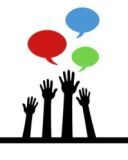

# GRIPDEC20

# Task :- 5

## Perform ‘Exploratory Data Analysis’ on dataset Indian Premier League’ 
* As a sports analysts, find out the most successful teams, players and factors  contributing win or loss of a team. 
* Tools using :- Python
* Dataset link:-https://drive.google.com/file/d/18iDDIIZGt8eWxzqbyMIqcn5X7bHINuLw/view

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
df.shape

(756, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
df.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

In [6]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
df=df.drop(columns=['umpire3'], axis=1)

In [8]:
df.shape

(756, 17)

In [9]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


### q.no 1:-The team with the most number of wins per season. 

In [10]:
teams_per_season=df.groupby('season')['winner'].value_counts()
teams_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [11]:
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1  
        

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [12]:
win_per_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


Text(0.5, 1.0, 'Most number of IPL season Wins By Team')

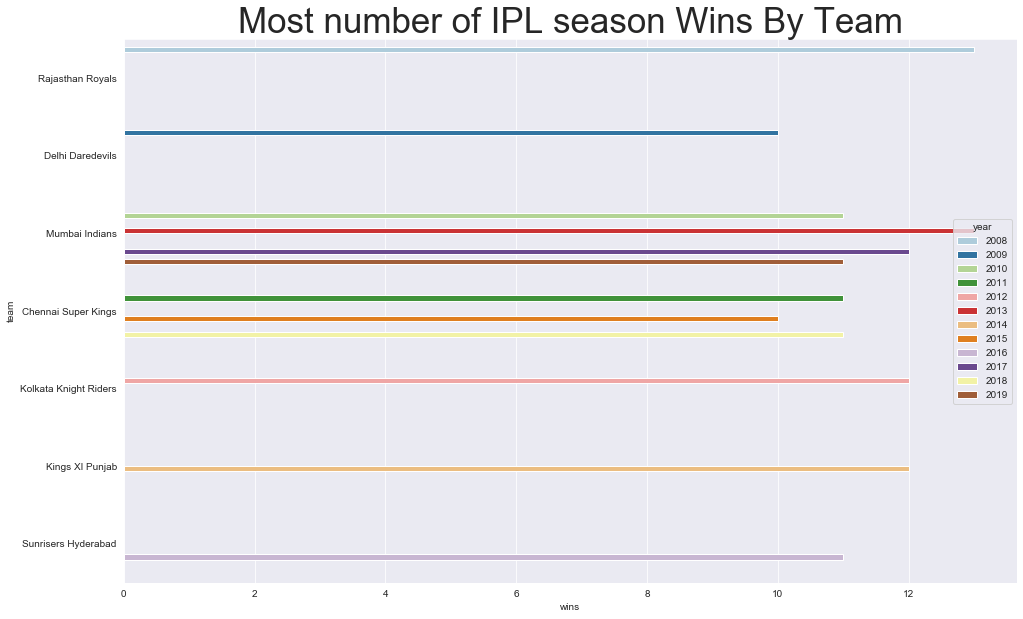

In [27]:
sns.barplot('wins', 'team', hue='year', data=win_per_season_df, palette='Paired')
plt.title("Most number of IPL season Wins By Team",fontsize=35)

#### Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, and 2019).

###  q.no 2:- Does winning the toss has any advantage?

In [30]:
win_count = 0
for index, value in df.iterrows():
    if(value['toss_winner']==value['winner']):
#         print(value['winner'])
        win_count += 1

print(f'The number of times the team winning toss have won: {win_count}')
prob = win_count/len(df)
print('The probability of winning if won the toss: {:.2f}' .format(prob))    

The number of times the team winning toss have won: 393
The probability of winning if won the toss: 0.52


#### The probability of winning when the team had won the toss is 52%. So winning toss gives a slight edge over the opponent.

### q.no 3:- Player who have won the most player of the match (season (2008-2019)) 

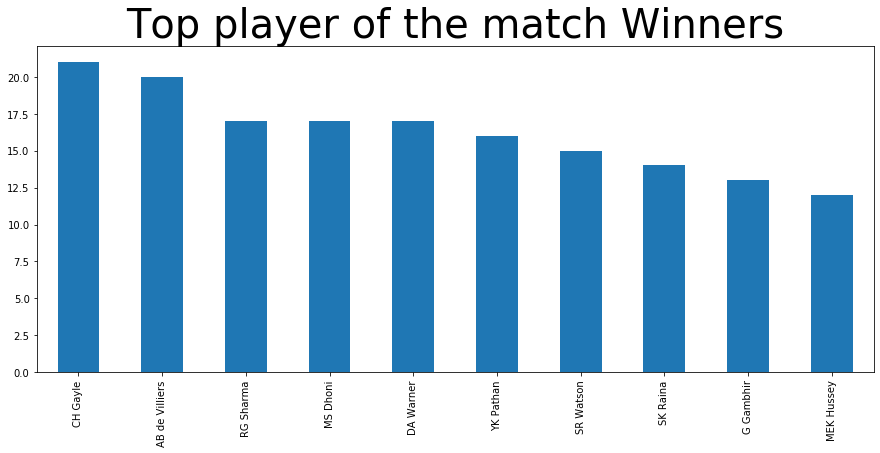

In [14]:
plt.subplots(figsize=(15,6))
plt.title('Top player of the match Winners',fontsize=40)
df["player_of_match"].value_counts().head(10).plot.bar()

### q.no 4:- Team which has won most number of matches (season (2008-2019))

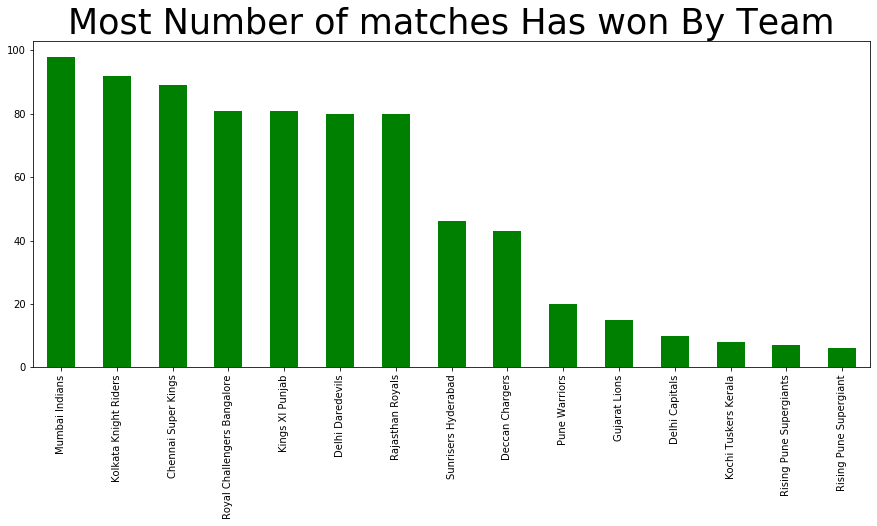

In [15]:
plt.subplots(figsize=(15,6))
plt.title('Most Number of matches Has won By Team',fontsize=35)
df['toss_winner'].value_counts().plot.bar(color='green')

### q.no 5:- Which venue had conducted maximum number of matches

In [16]:
venue_count = df['venue'].value_counts()
venue_count

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

Text(0.5, 1.0, 'Ground in Which most numbe of Matches Played')

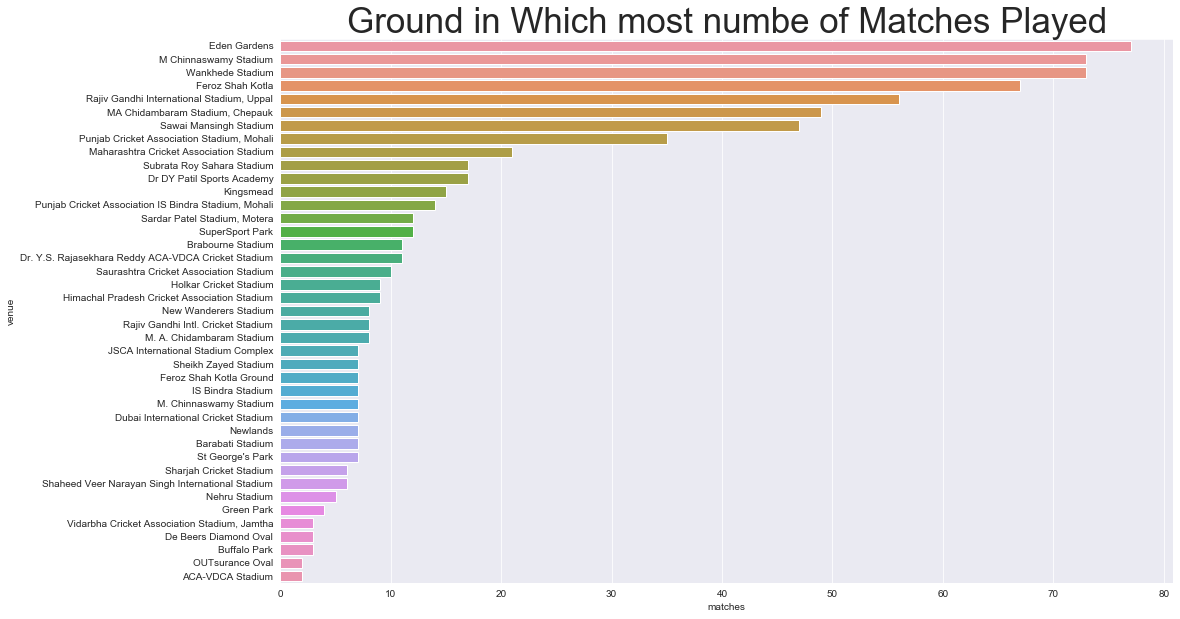

In [17]:
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (16,10)

venue = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_count.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue = venue.append(temp_df, ignore_index=True)
sns.barplot('matches','venue',data=venue)
plt.title('Ground in Which most numbe of Matches Played',fontsize=35)

####  Eden Gardens has hosted the maximum number of IPL matches followed by M Chinnaswamy Stadium and Wankhede Stadium

### q.no 6:-  Cities that hosted maximum IPL matches

In [18]:
city_counts=df['city'].value_counts()
city_counts

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Port Elizabeth      7
Ranchi              7
Abu Dhabi           7
Cape Town           7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [19]:
city_df = pd.DataFrame(columns=['city', 'matches'])
for items in city_counts.iteritems():
    temp_df = pd.DataFrame({
        'city':[items[0]],
        'matches':[items[1]]
    })
    city_df = city_df.append(temp_df, ignore_index=True)

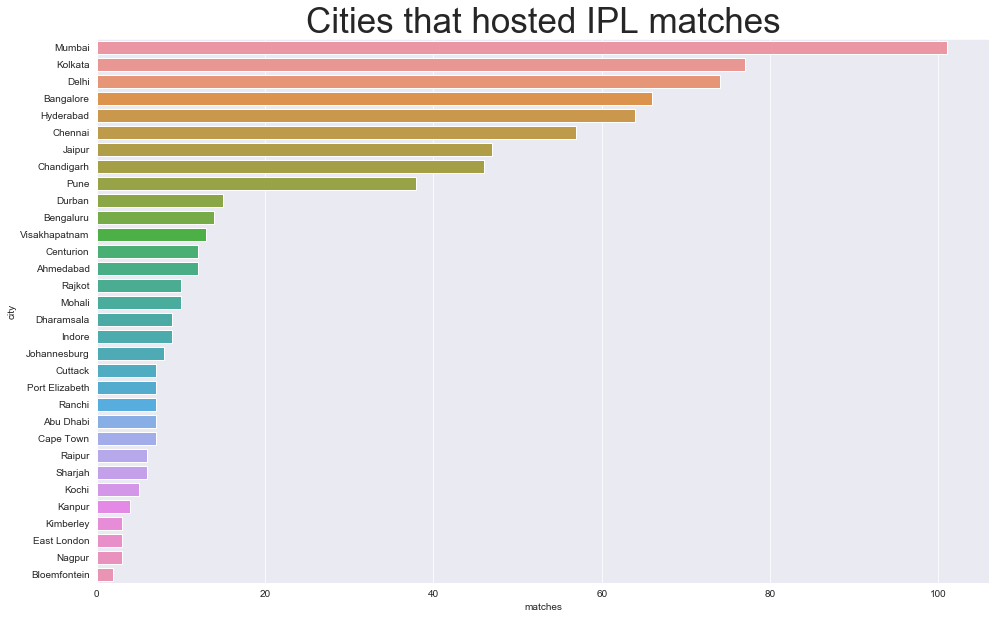

In [20]:
plt.title("Cities that hosted IPL matches",fontsize=35)
sns.barplot(x='matches', y='city', data=city_df);

### q.no 7:- Season which had most number of Matches

In [21]:
df['season'].value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

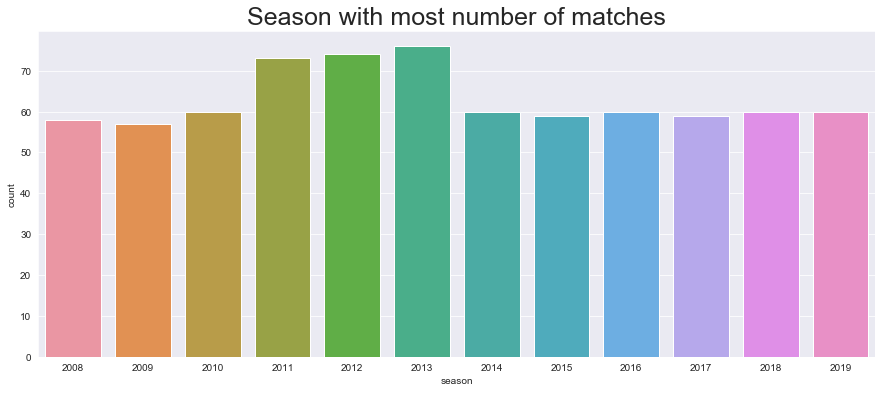

In [22]:
plt.figure(figsize=(15,6))
sns.countplot(x='season',data=df)
plt.title('Season with most number of matches',fontsize=25)
plt.show()

####  Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, and 2019).

### q.no 8:- The most successful IPL team

In [23]:
team_wins_ser = df['winner'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_df= pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df, ignore_index=True)

In [24]:
team_wins_df

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


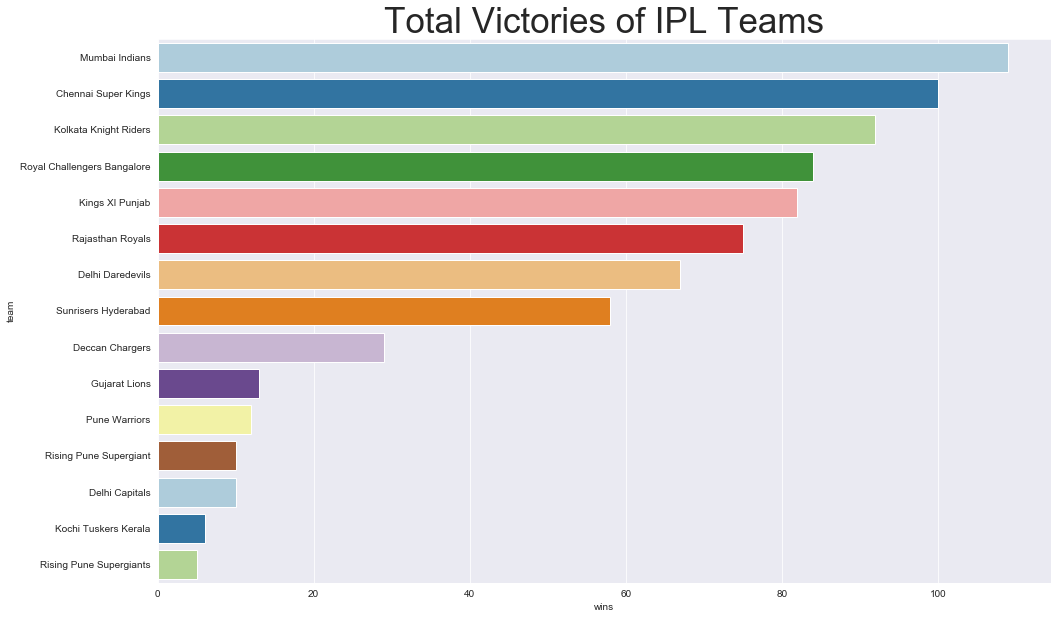

In [25]:
plt.title("Total Victories of IPL Teams",fontsize=35)
sns.barplot(x='wins', y='team', data=team_wins_df, palette='Paired');

####  Chennai Super Kings is the most successful team(as they have won the maximum number of IPL matches -57) followed by Chennai Super Kings and Kolkata Knight Riders.

### Q no 9:- Which umpire has officiated the most number of IPL matches on-field? 

In [31]:
umpire1_ser = df['umpire1'].value_counts()
umpire2_ser = df['umpire2'].value_counts()

In [32]:
umpires_df = pd.concat([umpire1_ser, umpire2_ser], axis=1)
umpires_df

,umpire1,umpire2
HDPK Dharmasena,73.0,14.0
Asad Rauf,51.0,NaN
S Ravi,49.0,57.0
AK Chaudhary,43.0,15.0
Aleem Dar,38.0,NaN
...,...,...
K Srinivasan,NaN,3.0
KN Anantapadmanabhan,NaN,3.0
SD Ranade,NaN,2.0
Nand Kishore,NaN,1.0


In [34]:
umpire_ser = umpires_df.sum(axis=1)

umpire_df = pd.DataFrame(columns=["umpire", "matches"])

for items in umpire_ser.iteritems():
    temp_df = pd.DataFrame({
        'umpire':[items[0]],
        'matches':[items[1]]
    })
    umpire_df= umpire_df.append(temp_df, ignore_index=True) 

In [35]:
umpire_df.sort_values('matches', ascending=False).head()

,umpire,matches
2,S Ravi,106.0
0,HDPK Dharmasena,87.0
12,C Shamshuddin,73.0
3,AK Chaudhary,58.0
60,SJA Taufel,55.0


#### S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field, followed by former Sri Lankan international cricketer HDPK Dharmasena.

### q.no 10:- year wise after winning the toss,what to decide  bat or filed ?

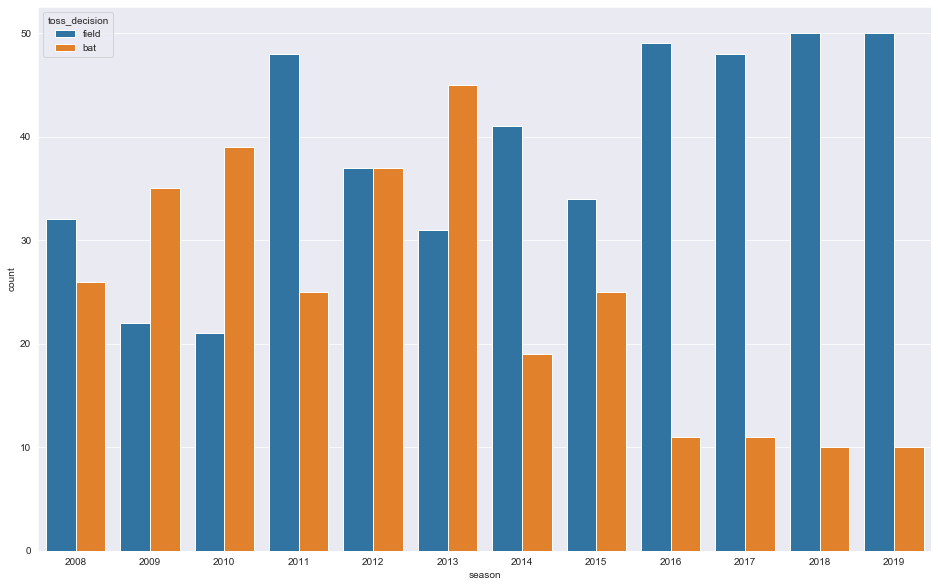

In [36]:
plt.subplots()
sns.countplot(x="season",hue="toss_decision",data=df)
plt.show()

### q.no 11:- Team won by Maximum Runs 

In [37]:
df.iloc[df['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object

### q.no 12:-Team won by Minimum Runs 

In [38]:
df.iloc[df[df['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

### q.no 13:- Team won by Maximum Wickets

In [39]:
df.iloc[df['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

### q.no 14 :-  Team won by Minimum Wickets

In [40]:
df.iloc[df['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object

### q.no 15 :- Batting first Winner 

In [42]:
batting_first=df[df['win_by_runs']!=0]
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon


In [43]:
batting_first['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Rising Pune Supergiants         2
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

In [44]:
batting_first['winner'].value_counts().keys()

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Rajasthan Royals', 'Delhi Daredevils',
       'Deccan Chargers', 'Pune Warriors', 'Rising Pune Supergiant',
       'Delhi Capitals', 'Rising Pune Supergiants', 'Kochi Tuskers Kerala',
       'Gujarat Lions'],
      dtype='object')

In [45]:
batting_first['winner'].value_counts()[0:5].keys()

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Royal Challengers Bangalore'],
      dtype='object')

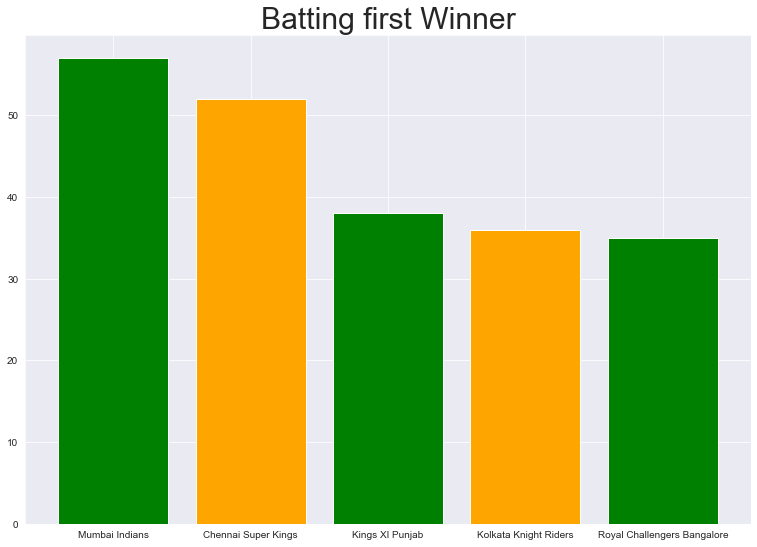

In [46]:
plt.figure(figsize=(13,9))
plt.title('Batting first Winner',fontsize=30)
plt.bar(list(batting_first['winner'].value_counts()[0:5].keys()),list(batting_first['winner'].value_counts())[0:5],color=["green","orange"])
plt.show()

### q.no 16 :- Batting second Winner 

In [47]:
batting_second=df[df['win_by_wickets']!=0]
batting_second.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan


In [48]:
batting_second['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Delhi Daredevils               42
Kings XI Punjab                42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Delhi Capitals                  6
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

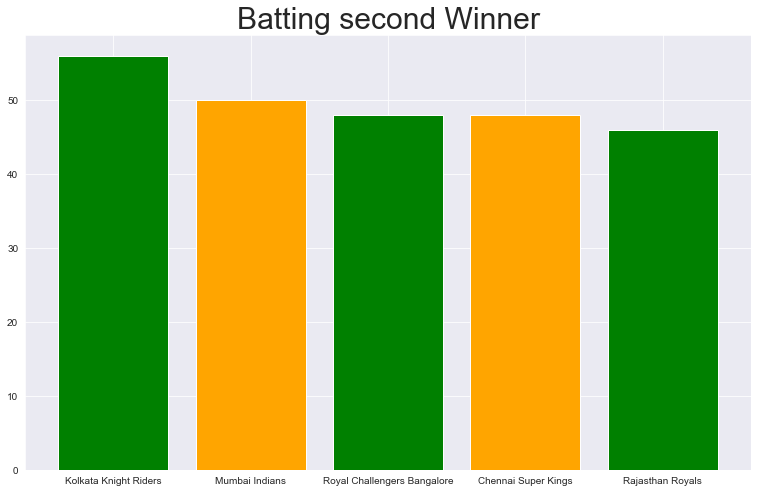

In [49]:
plt.figure(figsize=(13,8))
plt.bar(list(batting_second['winner'].value_counts()[0:5].keys()),list(batting_second['winner'].value_counts())[0:5],color=["green","orange"])
plt.title('Batting second Winner',fontsize=30)
plt.show()

# ThankYou 